**Research Question:** The goal of this project is to develop a predictive model that can inform for a given bladder cancer patient whether the cancer will recur or not. We aim to identify disease characteristics (features) that are most predictive of this recurrence.

**Data Source:** Kaggle published dataset:  https://www.kaggle.com/datasets/utkarshx27/bladder-cancer-recurrences/data

*Publication Source:* Wei, L. J., Lin, D. Y., & Weissfeld, L. (1989). Regression analysis of multivariate incomplete failure time data by modeling marginal distributions. Journal of the American Statistical Association, 84(408), 1065–1073.

**About Data Fields:**
- id: Patient ID
- treatment:	Treatment received (Placebo, pyridoxine (vitamin B6), or thiotepa)
- number: Initial number of tumors
- size:	Size (cm) of largest initial tumor
- recur: Number of recurrences
- start: Start time of each interval
- stop: End time of each interval
- status: End of interval code (0=censored, 1=recurrence, 2=death from bladder disease, 3=death other/unknown cause)
- rtumor: Number of tumors found at recurrence
- rsize: Size of largest tumor at recurrence
- enum: Event number (observation number within patient)

**1. Loading Data and Understanding Dataset Characteristics**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
#Load data into dataframe
df = pd.read_csv('bladder1.csv')

df.head()

,Unnamed: 0,id,treatment,number,size,recur,start,stop,status,rtumor,rsize,enum
0,1,1,placebo,1,1,0,0,0,3,.,.,1
1,2,2,placebo,1,3,0,0,1,3,.,.,1
2,3,3,placebo,2,1,0,0,4,0,.,.,1
3,4,4,placebo,1,1,0,0,7,0,.,.,1
4,5,5,placebo,5,1,0,0,10,3,.,.,1


In [11]:
#Understand elements of the dataset
df.describe()

,Unnamed: 0,id,number,size,recur,start,stop,status,enum
count,294.000000,294.000000,294.00000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,147.500000,60.085034,2.37415,1.993197,3.595238,11.197279,23.795918,0.931973,2.704082
std,85.014705,31.598531,1.79385,1.539011,3.022573,13.733017,15.953618,0.793832,2.092776
min,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,74.250000,34.000000,1.00000,1.000000,1.000000,0.000000,10.000000,0.000000,1.000000
50%,147.500000,61.500000,2.00000,1.000000,3.000000,4.000000,23.000000,1.000000,2.000000
75%,220.750000,87.000000,3.00000,3.000000,5.000000,20.000000,36.000000,1.000000,4.000000
max,294.000000,118.000000,8.00000,8.000000,9.000000,52.000000,64.000000,3.000000,10.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  294 non-null    int64 
 1   id          294 non-null    int64 
 2   treatment   294 non-null    object
 3   number      294 non-null    int64 
 4   size        294 non-null    int64 
 5   recur       294 non-null    int64 
 6   start       294 non-null    int64 
 7   stop        294 non-null    int64 
 8   status      294 non-null    int64 
 9   rtumor      294 non-null    object
 10  rsize       294 non-null    object
 11  enum        294 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 27.7+ KB


In [13]:
# Since some of the entries are for same patients, let's identify the # of unique patients
df['id'].nunique()

118

In [14]:
# rtumor and rsize are showing up as objects (not int fields)
# Understand unique values
print("Unique values in 'rtumor':")
print(df['rtumor'].unique())

print("\nUnique values in 'rsize':")
print(df['rsize'].unique())

Unique values in 'rtumor':
['.' '1' '2' '3' '6' '8' '7' '5' '4']

Unique values in 'rsize':
['.' '1' '4' '2' '8' '3' '5']


In [15]:
# Replace the entries '.' to flag as missing values
df['rtumor'].replace('.', np.nan, inplace=True)
df['rsize'].replace('.', np.nan, inplace=True)

In [16]:
# Convert the rtumor and rsize fields to numeric
df['rtumor'] = pd.to_numeric(df['rtumor'], errors='coerce')
df['rsize'] = pd.to_numeric(df['rsize'], errors='coerce')

In [17]:
# Missing Values
df.isnull().sum()

,0
Unnamed: 0,0
id,0
treatment,0
number,0
size,0
recur,0
start,0
stop,0
status,0
rtumor,108


In [18]:
 # Missing values as %
(df.isnull().sum() / len(df) * 100).round(2)

,0
Unnamed: 0,0.00
id,0.00
treatment,0.00
number,0.00
size,0.00
recur,0.00
start,0.00
stop,0.00
status,0.00
rtumor,36.73


In [19]:
# Identify duplicates
duplicates = df[df.duplicated()]
duplicates

,Unnamed: 0,id,treatment,number,size,recur,start,stop,status,rtumor,rsize,enum


In [20]:
#Rename columns to more meaningful names
df.rename(columns={
    'id': 'patient_ID',
    'number': 'num_init_tumor',
    'size': 'size_init_tumor',
    'recur': 'num_recur',
    'status': 'patient_status',
    'rtumor': 'num_tumor_recur',
    'rsize': 'size_recur',
    'enum': 'event_num'
}, inplace=True)

In [21]:
# Create new column as interval duration and eliminate start and stop columns
df['interval_dur'] = df['stop'] - df['start']
df.drop(['start', 'stop'], axis=1, inplace=True)

In [ ]:
df.head()

,Unnamed: 0,patient_ID,treatment,num_init_tumor,size_init_tumor,num_recur,patient_status,num_tumor_recur,size_recur,event_num,interval_dur
0,1,1,placebo,1,1,0,3,NaN,NaN,1,0
1,2,2,placebo,1,3,0,3,NaN,NaN,1,1
2,3,3,placebo,2,1,0,0,NaN,NaN,1,4
3,4,4,placebo,1,1,0,0,NaN,NaN,1,7
4,5,5,placebo,5,1,0,3,NaN,NaN,1,10


In [22]:
# Check if unnamed: 0 is index+1
comparison = df['Unnamed: 0'] == (df.index + 1)

all_match = comparison.all()
print(f"'Unnamed: 0' equals index + 1? {all_match}")

'Unnamed: 0' equals index + 1? True


In [23]:
# Make unnamed:0 as index column
df.set_index('Unnamed: 0', inplace=True)
df.index.name = None

In [24]:
# Create an aggregated version of this df with unique patients
agg = df.groupby('patient_ID')['event_num'].idxmax()
df_agg = df.loc[agg].reset_index(drop=True)
df_agg

,patient_ID,treatment,num_init_tumor,size_init_tumor,num_recur,patient_status,num_tumor_recur,size_recur,event_num,interval_dur
0,1,placebo,1,1,0,3,NaN,NaN,1,0
1,2,placebo,1,3,0,3,NaN,NaN,1,1
2,3,placebo,2,1,0,0,NaN,NaN,1,4
3,4,placebo,1,1,0,0,NaN,NaN,1,7
4,5,placebo,5,1,0,3,NaN,NaN,1,10
...,...,...,...,...,...,...,...,...,...,...
113,114,thiotepa,1,1,0,0,NaN,NaN,1,50
114,115,thiotepa,4,1,3,0,NaN,NaN,4,3
115,116,thiotepa,3,4,0,0,NaN,NaN,1,54
116,117,thiotepa,2,1,1,0,NaN,NaN,2,16


**2. EDA - Trends**

In [25]:
# Here we aim to better understand trends in the data

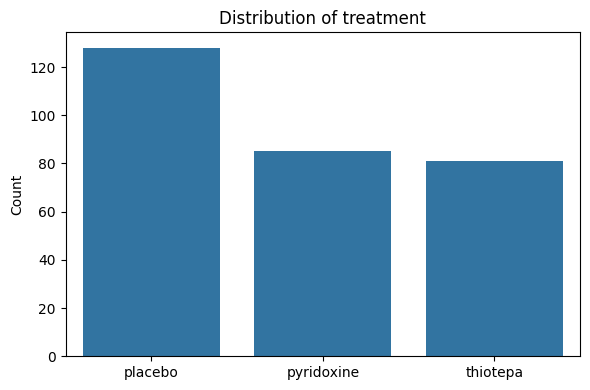

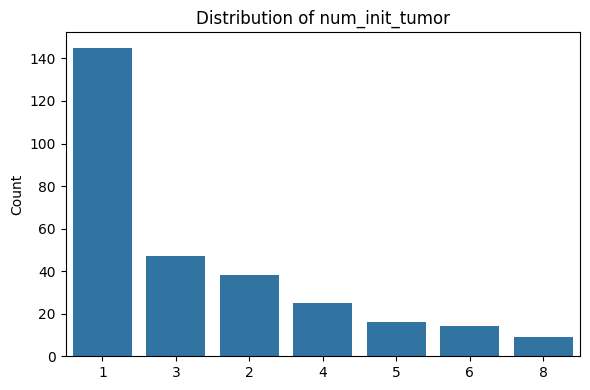

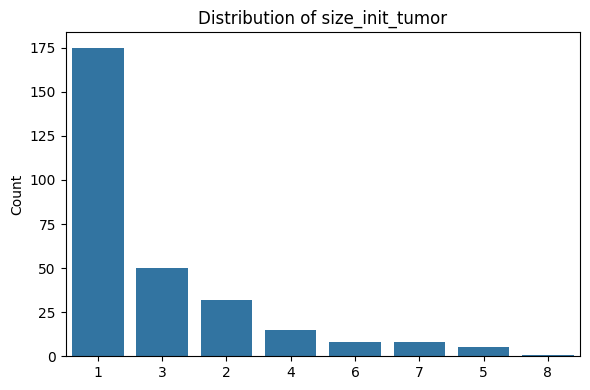

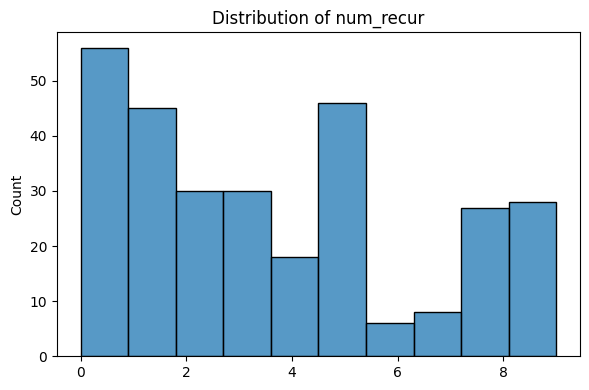

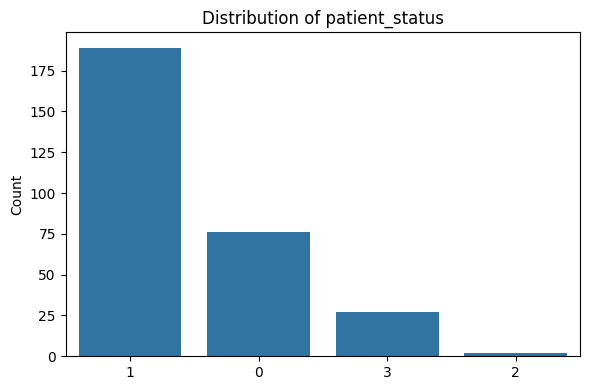

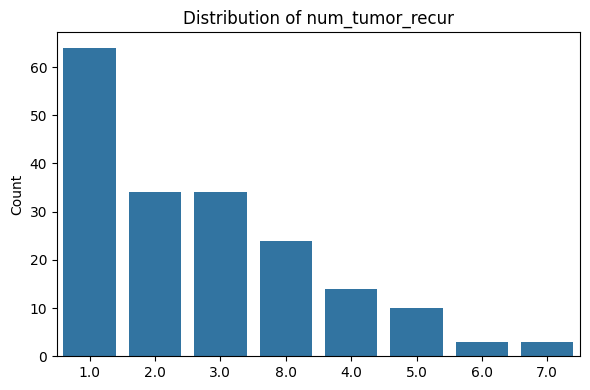

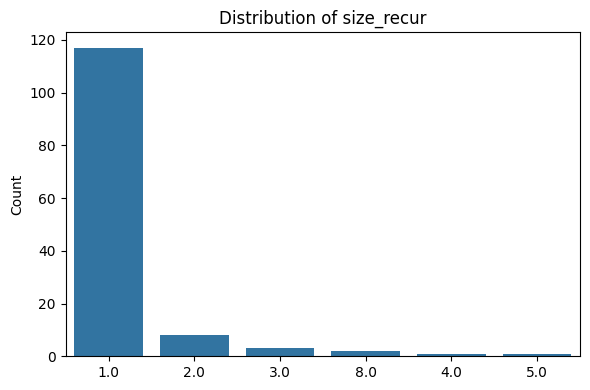

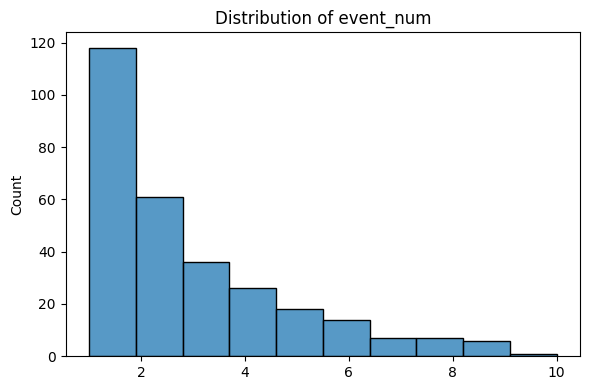

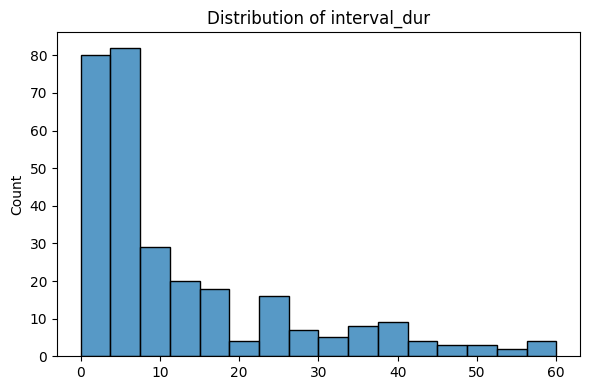

In [26]:
# Histogram plot of all features to understand data distribution
skip = ['patient_ID']

cols_to_plot = [col for col in df.columns if col not in skip]

for col in df.columns:
  if col in skip:
    continue
  plt.figure(figsize=(6, 4))
  if df[col].dtype == 'object' or df[col].nunique() < 10:
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
  else:
    sns.histplot(df[col].dropna())

  plt.title(f'Distribution of {col}')
  plt.xlabel('')
  plt.ylabel('Count')
  plt.tight_layout()
  plt.show()

# From these plots, the number and size of inital tumors, treatment and number of recurrences might be skewed due to the fact that some of these patients might have had multiple disease recurrences
# Next, we look at these plots in the aggregated patient view only

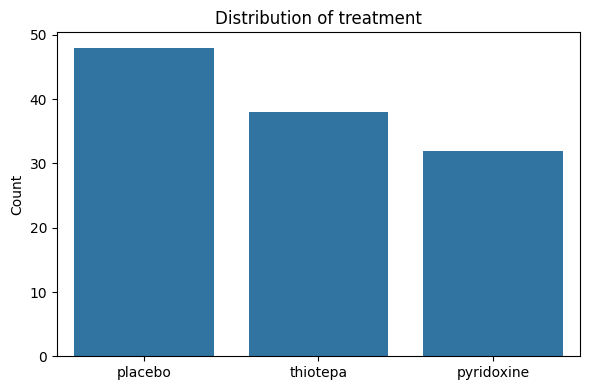

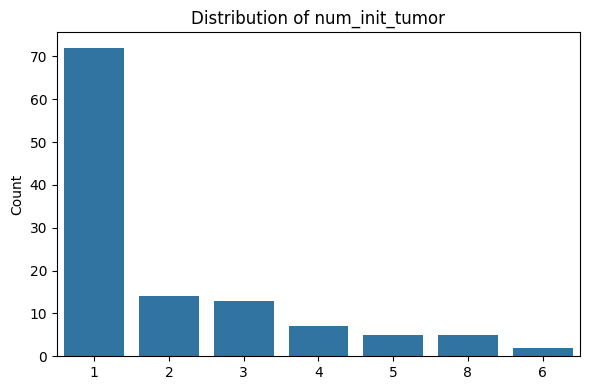

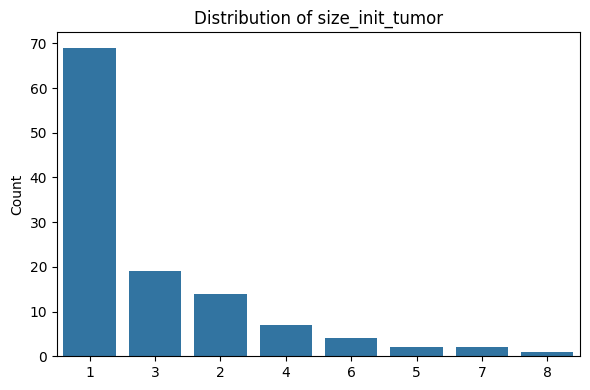

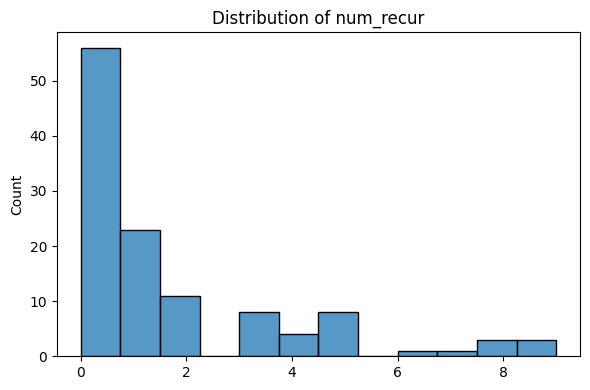

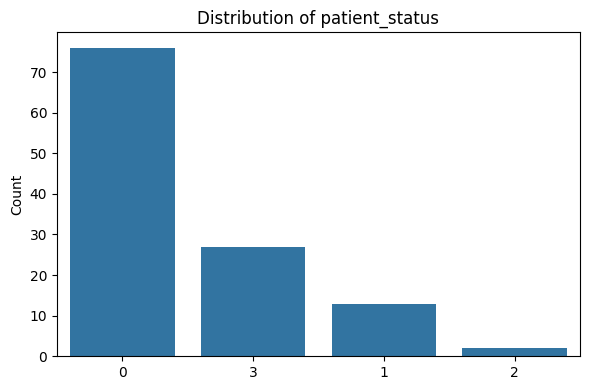

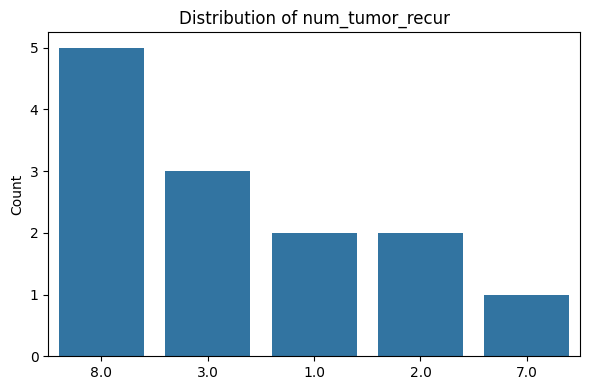

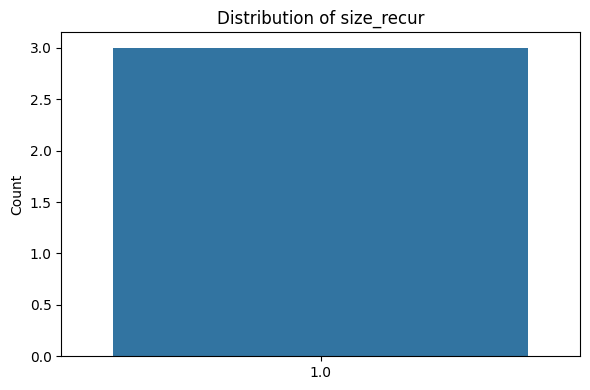

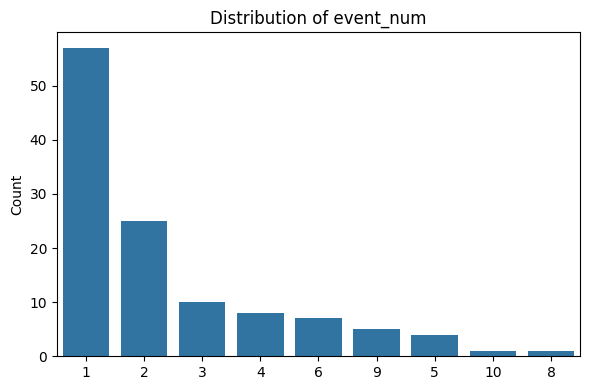

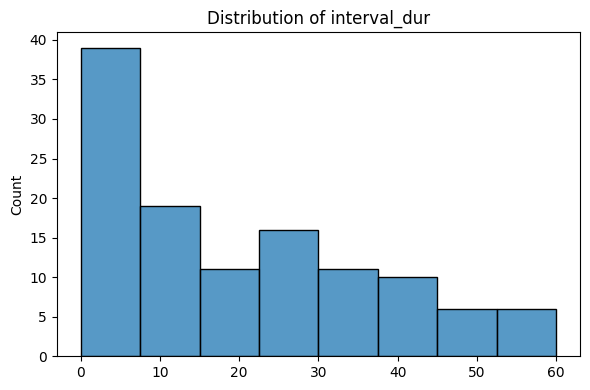

In [27]:
# Histogram plot of all features for unique patients
skip = ['patient_ID']

cols_to_plot = [col for col in df_agg.columns if col not in skip]

for col in df_agg.columns:
  if col in skip:
    continue
  plt.figure(figsize=(6, 4))
  if df_agg[col].dtype == 'object' or df_agg[col].nunique() < 10:
    sns.countplot(x=col, data=df_agg, order=df_agg[col].value_counts().index)
  else:
    sns.histplot(df_agg[col].dropna())

  plt.title(f'Distribution of {col}')
  plt.xlabel('')
  plt.ylabel('Count')
  plt.tight_layout()
  plt.show()

# For most metrics, the aggregated dataframe view is more informative

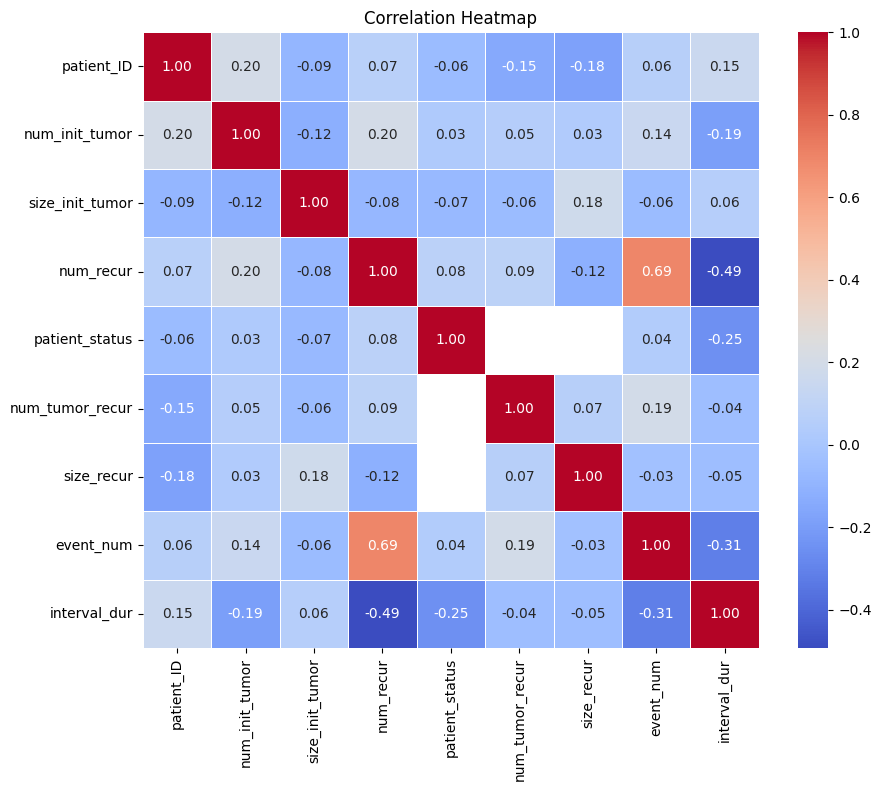

In [28]:
# Correlation Matrix plot
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
# From the heatmap above, we observe that the smaller the interval duration the more likely it is that the patient has recurring disease and the higher is their event number
# Interstingly, the size of the initial tumor and size of tumor at recurrence dont seem to correlate with the recurrence event number
# A positive but weak correlation is observed between the number of the initial tumors and the number of times that patient is likely to have disease recurring

In [30]:
# Let's understand characteristics of patients that have had recurring disease vs those that have not had their disease recurr

# First let's understand the rough split between those two patient groups
no_recur_count = (df_agg['num_recur'] == 0).sum()
one_plus_recur_count = (df_agg['num_recur'] >= 1).sum()

print(f"Patients with no recurrence: {no_recur_count}")
print(f"Patients with 1 or more recurrences: {one_plus_recur_count}")

# Target variable is reasonably balanced!

Patients with no recurrence: 56
Patients with 1 or more recurrences: 62


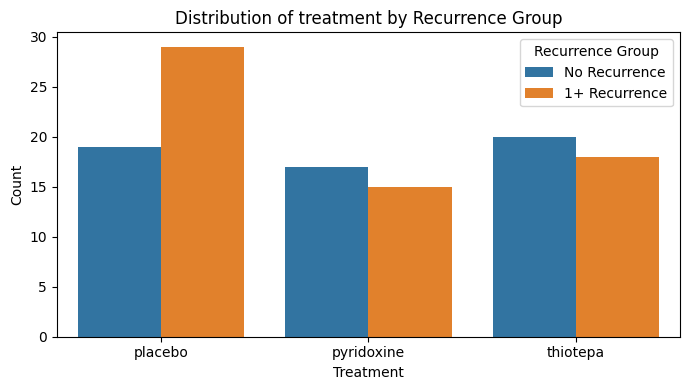

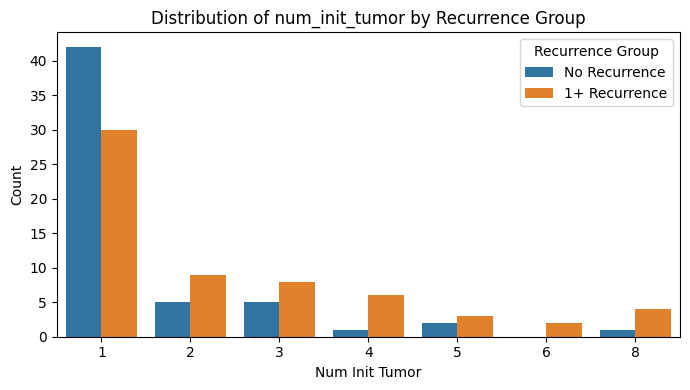

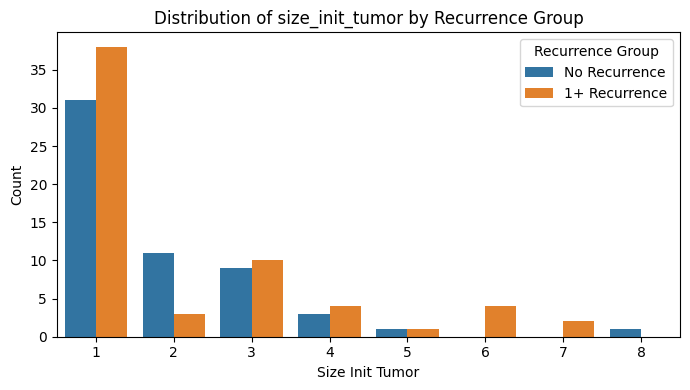

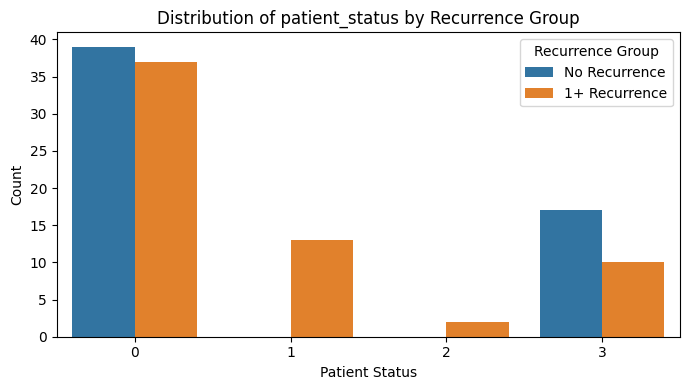

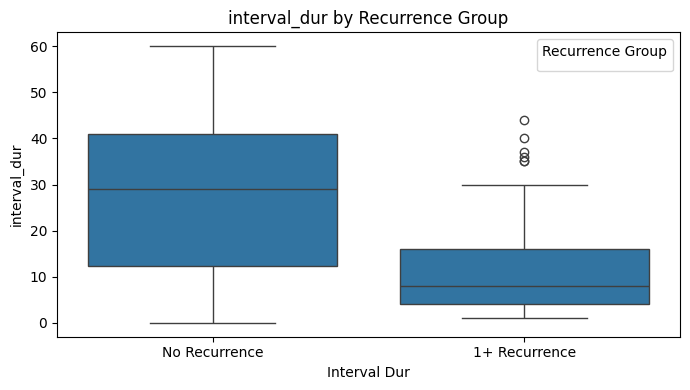

In [31]:
# Compare groups that didnt have disease recurrence with those that had disease recurr at least once
df_agg['recurrence_group'] = df_agg['num_recur'].apply(lambda x: 'No Recurrence' if x == 0 else '1+ Recurrence')

# Features to compare
features = ['treatment', 'num_init_tumor', 'size_init_tumor', 'patient_status', 'interval_dur']

for feature in features:
    plt.figure(figsize=(7, 4))

    if df_agg[feature].dtype == 'object'or df_agg[feature].nunique() < 10:
        sns.countplot(data=df_agg, x=feature, hue='recurrence_group')
        plt.title(f'Distribution of {feature} by Recurrence Group')
    else:
        sns.boxplot(data=df_agg, x='recurrence_group', y=feature)
        plt.title(f'{feature} by Recurrence Group')

    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Count' if df_agg[feature].dtype == 'object' or df_agg[feature].nunique() < 10 else feature)
    plt.legend(title='Recurrence Group')
    plt.tight_layout()
    plt.show()

In [32]:
# The plots above show interesting trends for patients that have had their disease recurr vs those that havent
# Patients with recurring disease tend to have smaller duration interval on therapy, they have a larger number of initial tumors and are more likely to be on placebo
# Other features such as size of intial tumor and patient status didnt seem to correlate easily one way or the other
# We also note that total number of patients that died of bladder cancer is faitly small in this sample rendering any observation around it inconclusive

**3. EDA - Feature Engineering**



In [33]:
# The goal of this project is to predict recurrence event and understand patient characteristics/features that are most predictive of that event

In [34]:
df_agg.describe()

,patient_ID,num_init_tumor,size_init_tumor,num_recur,patient_status,num_tumor_recur,size_recur,event_num,interval_dur
count,118.000000,118.000000,118.000000,118.000000,118.000000,13.000000,3.0,118.000000,118.000000
mean,59.500000,2.067797,2.016949,1.601695,0.830508,4.769231,1.0,2.491525,19.991525
std,34.207699,1.777008,1.557903,2.302506,1.249308,3.031882,0.0,2.194577,16.698685
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0,1.000000,0.000000
25%,30.250000,1.000000,1.000000,0.000000,0.000000,2.000000,1.0,1.000000,6.000000
50%,59.500000,1.000000,1.000000,1.000000,0.000000,3.000000,1.0,2.000000,15.000000
75%,88.750000,3.000000,3.000000,2.000000,1.000000,8.000000,1.0,3.000000,32.750000
max,118.000000,8.000000,8.000000,9.000000,3.000000,8.000000,1.0,10.000000,60.000000


In [35]:
# For modeling purposes we will focus on the df_agg dataset as it presents an aggregated view of unique patients
# Given that size of dataset is limited, we will anchor to the binary outcome in 'recurrence_group' i.e. disease recurred or not

In [36]:
# Prep the df_agg dataframe for modeling

# Remove column num_recur and event_num
df_model = df_agg.drop(columns=['num_recur', 'event_num'])

In [37]:
# Convert categorical fields to numerical ones

# 1. Recurrence_group target variable: convert no recurrence to 0 and 1+ recurrence to 1
df_model ['recurrence_group'] = df_model['recurrence_group'].map({'No Recurrence': 0, '1+ Recurrence': 1})

# 2. Treatment: map placebo (no treatment) to 0, pyridoxine to 1 and thiotepa to 2
df_model['treatment'] = df_model['treatment'].map({'placebo': 0, 'pyridoxine': 1, 'thiotepa': 2})

In [38]:
# Handle missing values

# We know from earlier that the # of tumor at recurrence and the size of tumor at recurrence has a lot of missing values
# Recompute this % for the aggregated dataframe

for col in ['num_tumor_recur', 'size_recur']:
    missing_pct = df_model[col].isna().mean() * 100
    print(f"{col}: {missing_pct:.1f}% missing values")

num_tumor_recur: 89.0% missing values
size_recur: 97.5% missing values


In [39]:
# Given the high percent of missing values in the aggregated patient view, we will drop these columns
df_model.drop(['num_tumor_recur', 'size_recur'], axis=1, inplace=True)

**4. Modeling**

*Addressing Small Sample Size*

As is the case with a lot of healthcare and patient related datasets, this dataset is fairly small in size

Challenges with such small dataset include overfitting and limited ability to generalize findings with new data

The target variable that we aim to predict "recurrence_group" is well balanced though

As such, we aim to leverage K-fold cross validation to address some of the challenges of the limited sample size




In [40]:
# Creating X and Y variables
X = df_model.drop(columns=['patient_ID', 'recurrence_group']) # eliminating patient ID as it is not informative
y = df_model['recurrence_group']

Here we define multiple classification models: Logisric Regression (regularized ridge and Lasso), KNN, SVM and decision trees.

We run hyperparameter tuning with GridSearchCV using stratified k-fold

Data is scaled for all models with the exception of decision trees which doesnt require it

In [41]:
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:
# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
# Use Pipeline to define models, scale where applicable  and define hyperparameter grids for tuning
models = {
    'L1_LogisticRegression': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))]),
        'params': {'clf__C': [0.01, 0.1, 1, 10, 100]}
        },

    'L2_LogisticRegression': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000))]),
        'params': {'clf__C': [0.01, 0.1, 1, 10, 100]}
        },

    'SVM': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', SVC(kernel='rbf', probability=True))]),
        'params': {'clf__C': [0.1, 1, 10], 'clf__gamma': ['scale', 'auto']}
        },

    'DecisionTree': {
        'pipeline': Pipeline([
            ('clf', DecisionTreeClassifier())]),
        'params': {'clf__max_depth': [3, 5, 10, None],'clf__min_samples_split': [2, 5, 10]}
        },

    'KNN': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('clf', KNeighborsClassifier())]),
        'params': {'clf__n_neighbors': [3, 5, 7, 9]}
        }
    }

In [44]:
# Define K-fold cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Optimizing for recall:

When dealing with cancer recurrence predictions, it is important to choose an evaluation metric that minimizes false negative as we don't want to miss potential patients that might recurr and classify them as low risk. In this case, recall is the best metric and as such we will optimize for it when running gridsearchCV

In [45]:
# Run GridSearch CV for every model
best_models = {}
for name, i in models.items():
    grid = GridSearchCV(
        i['pipeline'],
        param_grid=i['params'],
        cv=skf,
        scoring='recall',
        n_jobs=-1,
        verbose=0
    )
    # Fit on training data
    grid.fit(X_train, y_train)

    # Extract best model
    best_models[name] = {
        'best_estimator': grid.best_estimator_,
        'best_params': grid.best_params_,
        'best_score': grid.best_score_
    }


In [46]:
# Compare train/test accuracy, recall and precision for each of the models
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

results = []

for name, info in best_models.items():
    model = info['best_estimator']

    # Predicting on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluation metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)

    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Recall': recall,
        'Precision': precision
        })

# Creating dataframe of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Test Accuracy', ascending=False)

print(results_df)


                   Model  Train Accuracy  Test Accuracy    Recall  Precision
0  L1_LogisticRegression        0.755319       0.791667  0.846154   0.785714
1  L2_LogisticRegression        0.765957       0.750000  0.846154   0.733333
4                    KNN        0.797872       0.750000  0.769231   0.769231
3           DecisionTree        0.840426       0.625000  0.846154   0.611111
2                    SVM        0.638298       0.583333  1.000000   0.565217


Based on the results above we note the following:
- SVM: while it has a perfect recall score, it didnt perform as well on accuracy and precision
- L1 Logistic regression had a fairly high recall and reasonable accuracy and precision score
- L2 Logistic regression didnt perform as high on accuracy and precision although it still had good recall
- KNN performed lower on recall
- Decision tree had good recall but lower precision and accuracy scores

--> While recall is the evaluation metric of highest importance, we only look for reasonable accuracy and precision score (as we dont want to have too many false positives as well). Overall, the L1 logistic regression model performed best here.

The accuracy across testing and training sets is well balanced too suggesting we are not overfitting.

**5. Results & Recommendations**

  Going back to our business problem of identifying features that are most predictive of disease recurrence, we focus on understanding coefficients of the L1 Lasso logistic regression model

In [47]:
# Extracting coefficients from Lasso regression:

# Getting best L1 Model
l1_model = best_models['L1_LogisticRegression']['best_estimator']
log_reg = l1_model.named_steps['clf']

# Extracting Coefficients
coefficients = log_reg.coef_[0]

feature_names = X.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
    })

# Sort coefficients by absolute value
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient').set_index('Feature')

print(coef_df_sorted)

                 Coefficient
Feature                     
interval_dur       -1.270225
patient_status     -0.639113
num_init_tumor      0.538282
size_init_tumor     0.348826
treatment          -0.152414


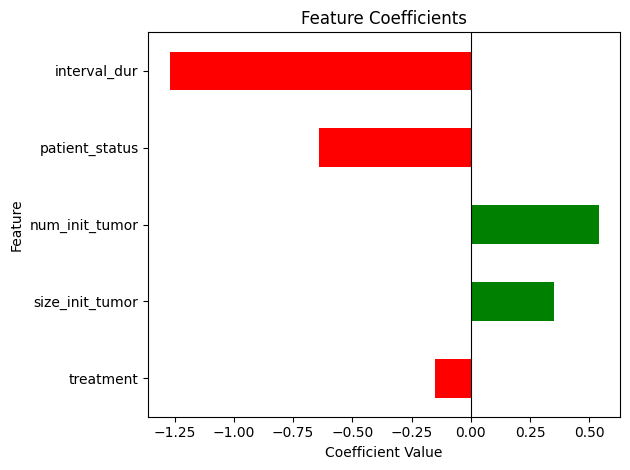

In [50]:
# Visualize Coefficients
colors = ['green' if c > 0 else 'red' for c in coef_df_sorted['Coefficient']]

coef_df_sorted['Coefficient'].iloc[::-1].plot(kind='barh', color=colors[::-1])

plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

Here we see that the top features that are most predictive of disease recurrence are the interval duration on therapy, the patient status and the number of initial tumors. The shorter the interval duration & the larger the number of initial tumors, the more likely cancer will recurr. Patient status is not as informative here given we don't know all conditions of patient status that were bucketed under "censored"  

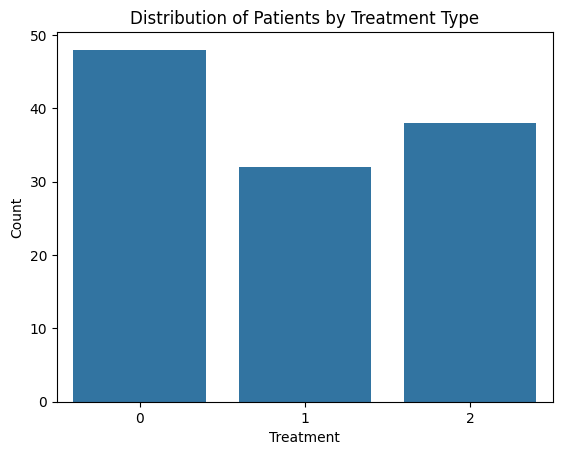

In [59]:
# Next we try to understand how well are model is able to predict disease recurrence for different patient subgroups as defined by their treatment type

# Understanding distribution of treatment types to confirm they are roughly evenly distributed
sns.countplot(data=df_model, x='treatment')
plt.title('Distribution of Patients by Treatment Type')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()


In [60]:
# Evaluate model for different patient subgroup

df_test = df_model.loc[X_test.index].copy()
df_test['y_true'] = y_test
df_test['y_pred'] = l1_model.predict(X_test)

treatment_types = df_test['treatment'].unique()
results = []

for t in treatment_types:
    subset = df_test[df_test['treatment'] == t]
    recall = recall_score(subset['y_true'], subset['y_pred']) # calculate recall score at the subgroup level
    accuracy = accuracy_score(subset['y_true'], subset['y_pred']) # calculate accuracy score at the subgroup level
    results.append({'Treatment': t, 'Recall': recall, 'Accuracy': accuracy})

results_df = pd.DataFrame(results)
print(results_df)



   Treatment    Recall  Accuracy
0          0  0.857143  0.818182
1          1  1.000000  0.857143
2          2  0.500000  0.666667


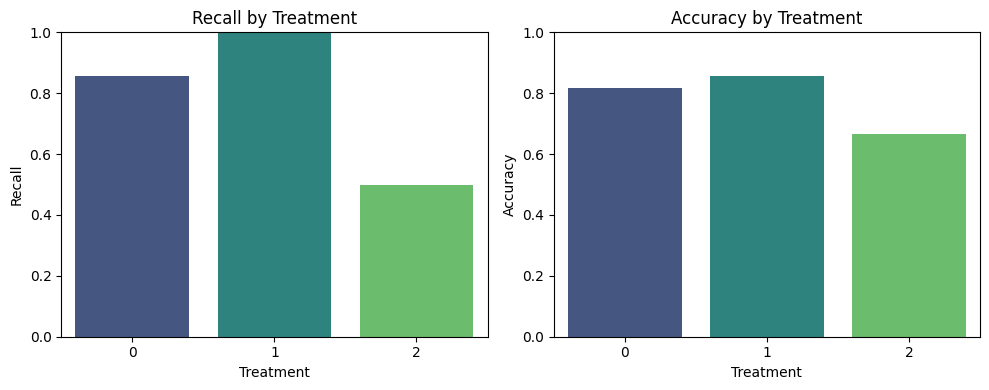

In [61]:
 # Plot findings of recall and accuracy scores
 plt.figure(figsize=(10,4))

# Recall
plt.subplot(1, 2, 1)
sns.barplot(data=results_df, x='Treatment', y='Recall', palette='viridis')
plt.ylim(0, 1)
plt.title('Recall by Treatment')

# Accuracy
plt.subplot(1, 2, 2)
sns.barplot(data=results_df, x='Treatment', y='Accuracy', palette='viridis')
plt.ylim(0, 1)
plt.title('Accuracy by Treatment')

plt.tight_layout()

As shown in the plots above, it is interesting to see that our model does a much better job of predicting recurrence for patients on therapy 0 or 1 i.e. placebo or pyridoxine but doesnt do as good of a job with therapy # 2 i.e. thiotepa. This is a limitation of the model but given the limited sample size per treatment subgroup, it doesnt make sense to rerun the model for each subgroup to extract feature importance at the subgroup level.